In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression

In [22]:
#Load the dataset
df=pd.read_csv("C:\\OneDrive\\Desktop\\bankfull.csv")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [23]:
df.drop(['job','education','contact','campaign','pdays','previous','poutcome'],inplace=True,axis=1)
df.head()

,age,marital,default,balance,housing,loan,day,month,duration,y
0,58,married,no,2143,yes,no,5,may,261,no
1,44,single,no,29,yes,no,5,may,151,no
2,33,married,no,2,yes,yes,5,may,76,no
3,47,married,no,1506,yes,no,5,may,92,no
4,33,single,no,1,no,no,5,may,198,no


In [24]:
df['marital']=pd.factorize(df.marital)[0] # married=0, single=1, divorced=2
df['default']=pd.factorize(df.default)[0] # no=0, yes=1
df['housing']=pd.factorize(df.housing)[0] # yes=0, no=1
df['loan']=pd.factorize(df.loan)[0]       # no=0, yes=1
df['month']=pd.factorize(df.month)[0]     # may=0,jun=1,jul=2,aug=3,oct=4,nov=5,dec=6,jan=7,feb=8,mar=9,apr=10,sep=11
df['y']=pd.factorize(df.y)[0]             # no=0, yes=1
df.head()

,age,marital,default,balance,housing,loan,day,month,duration,y
0,58,0,0,2143,0,0,5,0,261,0
1,44,1,0,29,0,0,5,0,151,0
2,33,0,0,2,0,1,5,0,76,0
3,47,0,0,1506,0,0,5,0,92,0
4,33,1,0,1,1,0,5,0,198,0


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   age       45211 non-null  int64
 1   marital   45211 non-null  int64
 2   default   45211 non-null  int64
 3   balance   45211 non-null  int64
 4   housing   45211 non-null  int64
 5   loan      45211 non-null  int64
 6   day       45211 non-null  int64
 7   month     45211 non-null  int64
 8   duration  45211 non-null  int64
 9   y         45211 non-null  int64
dtypes: int64(10)
memory usage: 3.4 MB


In [26]:
df.describe()

,age,marital,default,balance,housing,loan,day,month,duration,y
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,0.513238,0.018027,1362.272058,0.444162,0.160226,15.806419,2.940722,258.163080,0.116985
std,10.618762,0.692948,0.133049,3044.765829,0.496878,0.366820,8.322476,3.179741,257.527812,0.321406
min,18.000000,0.000000,0.000000,-8019.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,33.000000,0.000000,0.000000,72.000000,0.000000,0.000000,8.000000,0.000000,103.000000,0.000000
50%,39.000000,0.000000,0.000000,448.000000,0.000000,0.000000,16.000000,2.000000,180.000000,0.000000
75%,48.000000,1.000000,0.000000,1428.000000,1.000000,0.000000,21.000000,5.000000,319.000000,0.000000
max,95.000000,2.000000,1.000000,102127.000000,1.000000,1.000000,31.000000,11.000000,4918.000000,1.000000


In [27]:
#dividing our data into input and output variables
X=df.iloc[:,:9]
Y=df.iloc[:,9]

In [28]:
#LogisticRegression and fit model
classifier=LogisticRegression()
classifier.fit(X,Y)

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [29]:
#predict for x data set
y_pred=classifier.predict(X)

In [30]:
y_pred

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [31]:
y_pred_df=pd.DataFrame({'Actual':Y,'Predicted prob':y_pred})

In [32]:
y_pred_df

,Actual,Predicted prob
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
45206,1,1
45207,1,0
45208,1,1
45209,0,0


In [33]:
#confusion matrix for model accuracy
from sklearn.metrics import confusion_matrix
confusion_matrix=confusion_matrix(Y,y_pred)
print(confusion_matrix)

[[39122   800]
 [ 4333   956]]


In [34]:
#find accuracy
((39122+956)/(39122+800+4333+956))*100

88.64656831302116

In [35]:
#classification report
from sklearn.metrics import classification_report
print(classification_report(Y,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     39922
           1       0.54      0.18      0.27      5289

    accuracy                           0.89     45211
   macro avg       0.72      0.58      0.60     45211
weighted avg       0.86      0.89      0.86     45211



In [36]:
#ROC curve (Reciver Operating Curve)
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
probs=classifier.predict_proba(X)
probs=probs[:,1]

In [37]:
fpr,tpr,threshold=roc_curve(Y,probs)

In [38]:
auc=roc_auc_score(Y,y_pred)
auc

0.5803567145004417

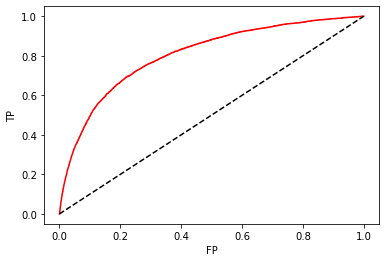

In [39]:
plt.plot(fpr,tpr,color='red')
plt.plot([0,1],[0,1],'k--')
plt.xlabel("FP");plt.ylabel("TP")
plt.show()